In [ ]:
#Guide: https://colab.research.google.com/github/roboflow-ai/notebooks/blob/main/notebooks/train-yolov8-object-detection-on-custom-dataset.ipynb#scrollTo=j0tsVilOCPyq

In [1]:
!pip install ultralytics==8.0.196 roboflow

In [2]:
# Downloading dataset created by roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="")
project = rf.workspace("").project("")
dataset = project.version(1).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Box-Detection-1 in yolov8:: 100%|██████████| 142/142 [00:00<00:00, 6755.42it/s]


In [3]:
# Train model

!yolo task=detect mode=train model=yolov8x.pt data=/content/Box-Detection-1/data.yaml epochs=100 imgsz=608 plots=True

100% 131M/131M [00:00<00:00, 322MB/s]
New https://pypi.org/project/ultralytics/8.0.225 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/content/Box-Detection-1/data.yaml, epochs=100, patience=50, batch=16, imgsz=608, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line

In [4]:
# Validate Custom Model

!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/Box-Detection-1/data.yaml

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68124531 parameters, 0 gradients, 257.4 GFLOPs
val: Scanning /content/Box-Detection-1/valid/labels.cache... 5 images, 0 backgrounds, 0 corrupt: 100% 5/5 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  2.46it/s]
                   all          5          9     0.0362      0.556     0.0424      0.027
Speed: 1.1ms preprocess, 65.2ms inference, 0.0ms loss, 4.4ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [5]:
# Inference

!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source=/content/Box-Detection-1/test/images save=True

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68124531 parameters, 0 gradients, 257.4 GFLOPs

image 1/3 /content/Box-Detection-1/test/images/20231121_115544_jpg.rf.3880925a21ca3dfafa62e6d920cdffd6.jpg: 608x608 124 Boxs, 92.7ms
image 2/3 /content/Box-Detection-1/test/images/20231121_115719_jpg.rf.6d9acdbe0956bb37caef77189b58ec5d.jpg: 608x608 212 Boxs, 50.2ms
image 3/3 /content/Box-Detection-1/test/images/IMG-20231102-WA0103_jpg.rf.dcbe8829def74386b51806b461cfe115.jpg: 608x608 181 Boxs, 50.0ms
Speed: 3.0ms preprocess, 64.3ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 608)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


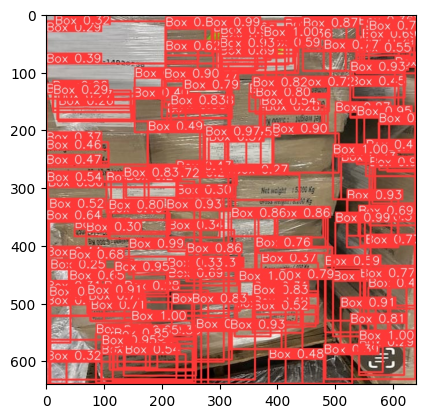

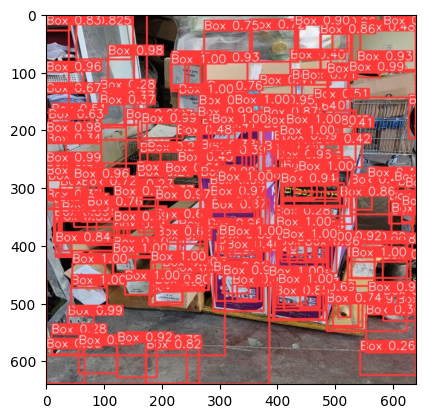

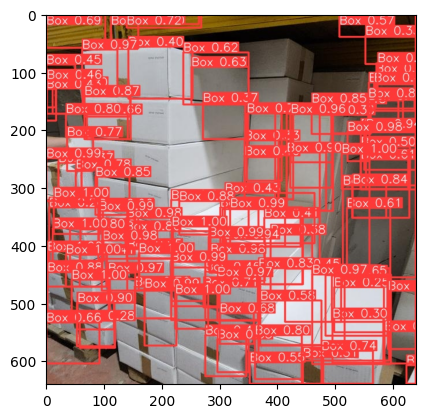

In [6]:
# Visualising results

import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the directory containing the result images
result_directory = "runs/detect/predict"

# Get a list of image files in the result directory
image_files = glob.glob(f"{result_directory}/*.jpg")

# Loop through each image file and display it
for image_file in image_files:
    # Read and display the image
    img = mpimg.imread(image_file)
    plt.imshow(img)
    plt.show()


In [ ]:
# Deploy model on Roboflow

project.version(1).deploy(model_type="yolov8", model_path=f"/content/runs/detect/train/")